In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [2]:
from sklearn.model_selection import train_test_split
from sklearn import tree

from sklearn.tree import DecisionTreeRegressor
from sklearn import ensemble
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.metrics import r2_score

In [3]:
df = pd.read_csv('CarPrice_Assignment.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

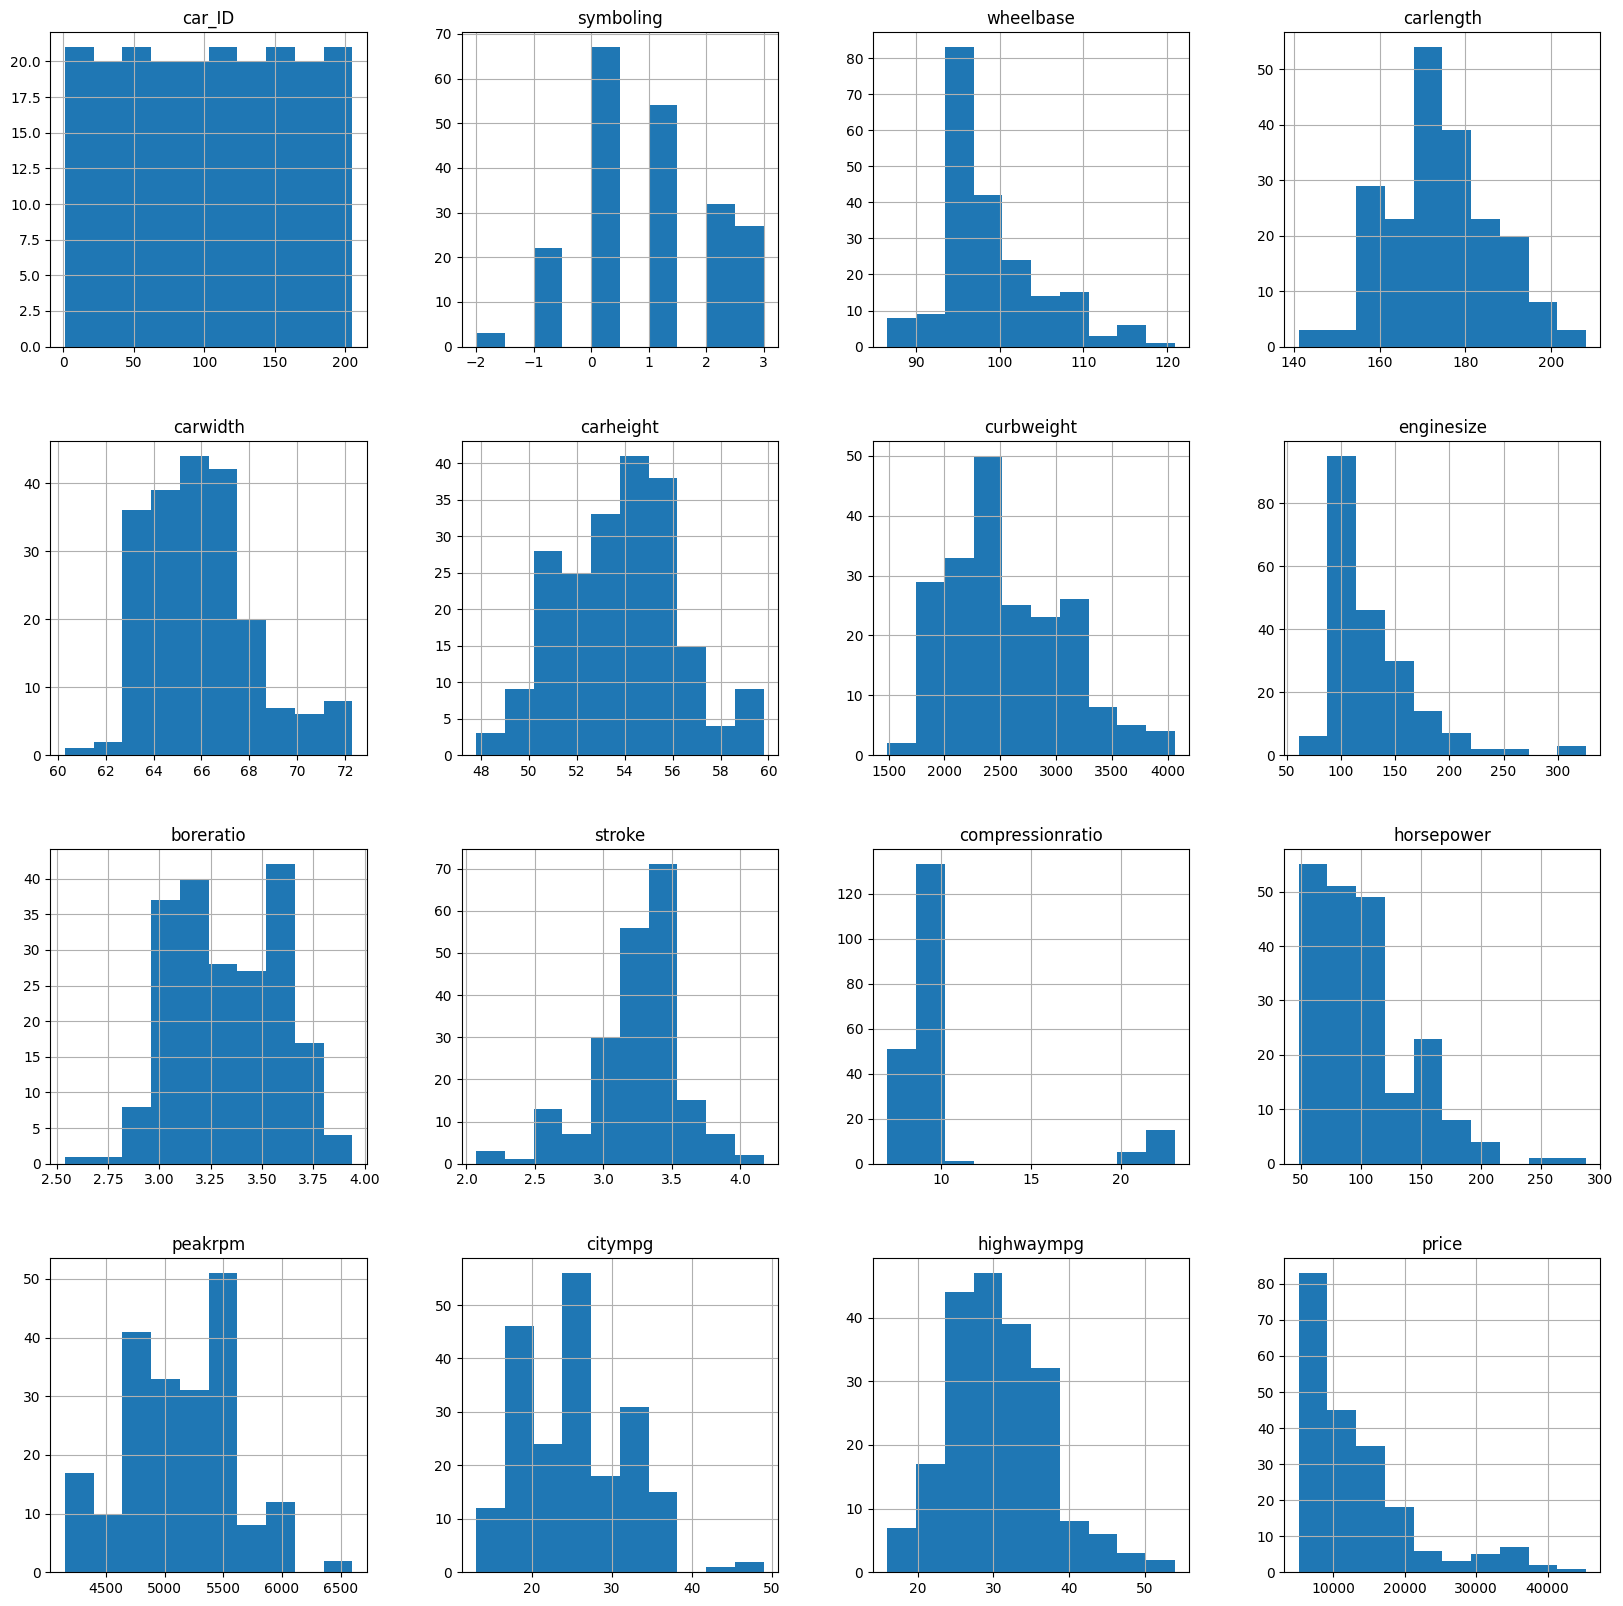

In [5]:
df.hist(figsize = (20,20))
plt.show()

<Axes: >

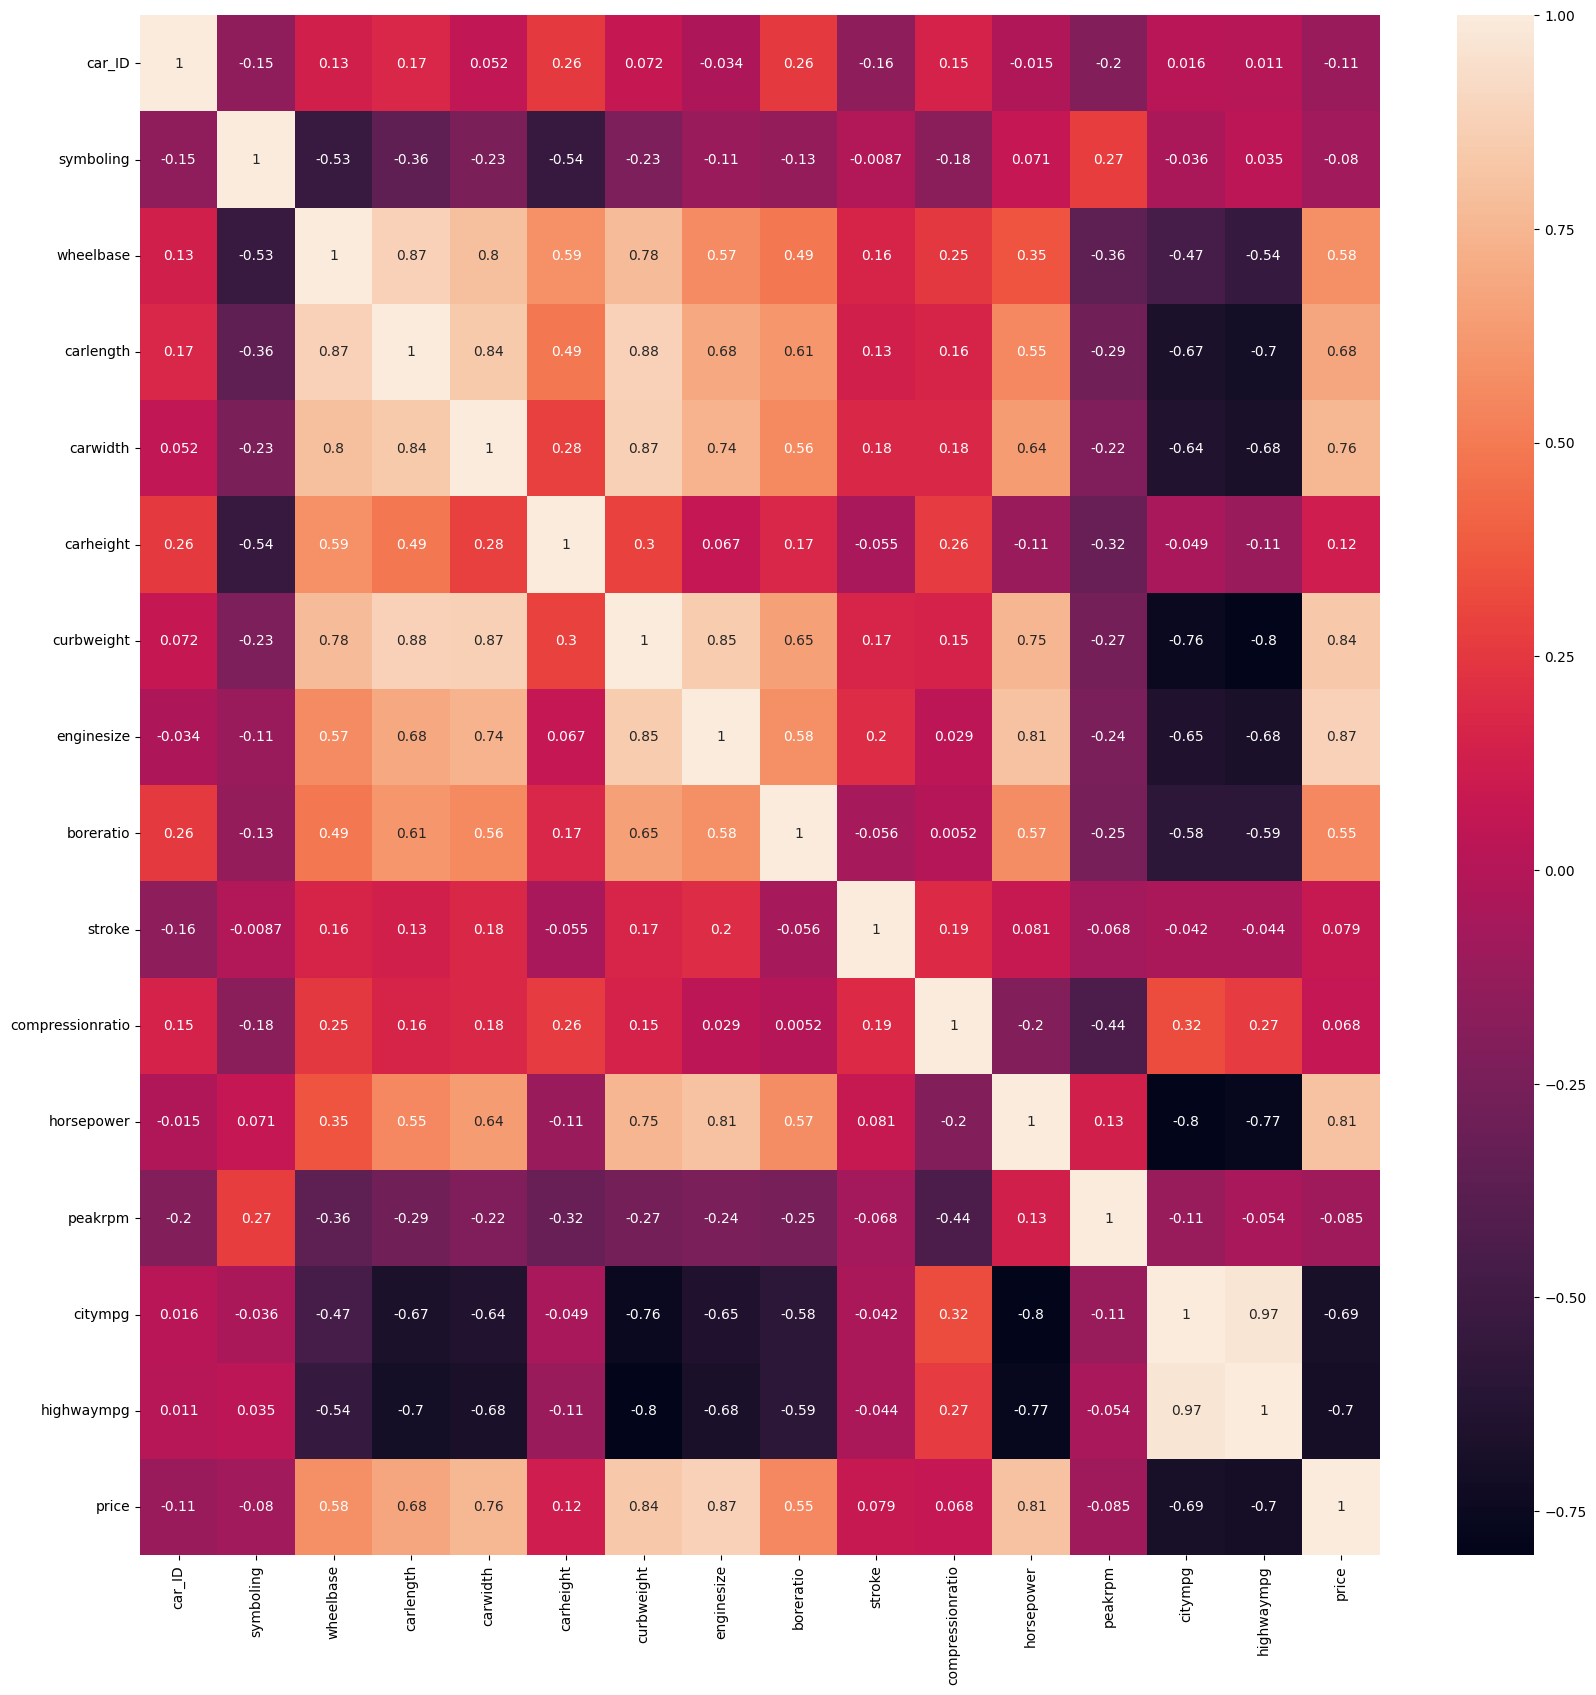

In [6]:
numeric_data = df.select_dtypes(include='number')

# Calculate the correlation matrix for the numeric columns
df_corr = numeric_data.corr()

# Create subplots and plot the heatmap
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(df_corr, annot=True)

<Axes: ylabel='price'>

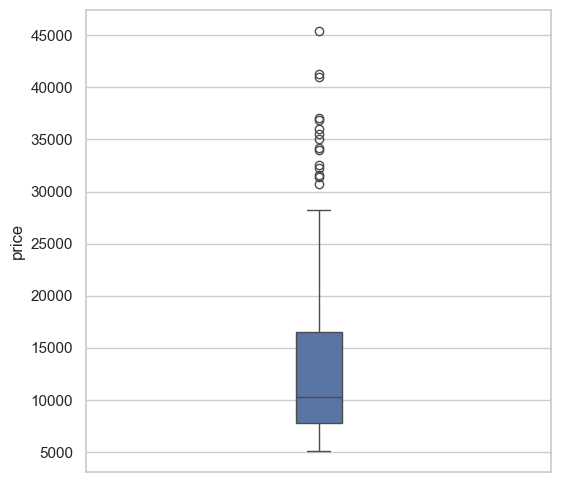

In [7]:
plt.figure(figsize=(6,6))
sns.set(style="whitegrid")
sns.boxplot(df, y = 'price', width = 0.1)

In [8]:
unique_fuel_types = df['fueltype'].unique()
print(unique_fuel_types)

['gas' 'diesel']


#### Cars with gas as fuel type are more readily available 

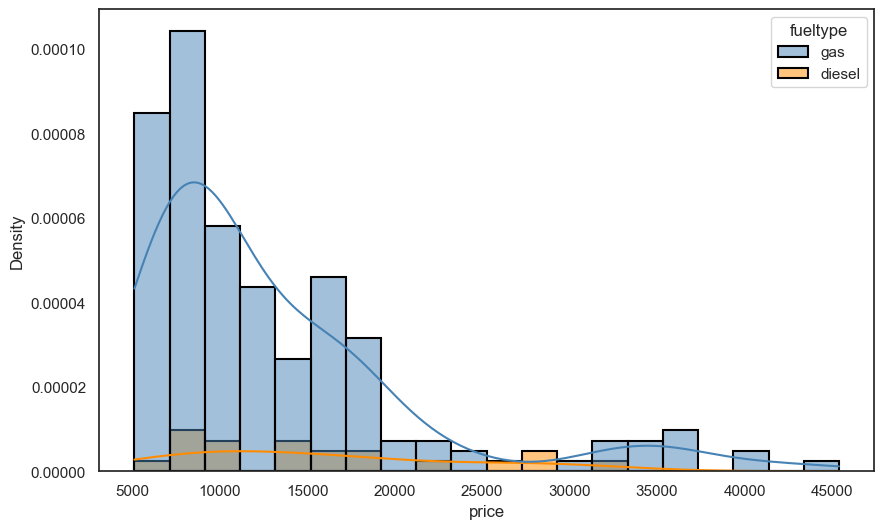

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a white background style without grid
sns.set_style("white")

# Define a custom color palette with specific colors
custom_palette = ['steelblue', 'darkorange']

# Create the figure and plot the histogram with borders and darker infills
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='price', hue='fueltype', kde=True, bins=20,
             element='bars', stat='density',
             palette=custom_palette,
             edgecolor='black',  # Set the color of the bar borders
             linewidth=1.5      # Set the width of the bar borders
            )

# Remove grid lines
plt.grid(False)

# Show the plot
plt.show()


In [15]:
print(df.value_counts('fueltype'))
print(df.value_counts('aspiration'))
print(df.value_counts('doornumber'))
print(df.value_counts('carbody'))
print(df.value_counts('drivewheel'))
print(df.value_counts('enginelocation'))
print(df.value_counts('enginetype'))
print(df.value_counts('cylindernumber'))
print(df.value_counts('fuelsystem'))

fueltype
gas       185
diesel     20
Name: count, dtype: int64
aspiration
std      168
turbo     37
Name: count, dtype: int64
doornumber
four    115
two      90
Name: count, dtype: int64
carbody
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: count, dtype: int64
drivewheel
fwd    120
rwd     76
4wd      9
Name: count, dtype: int64
enginelocation
front    202
rear       3
Name: count, dtype: int64
enginetype
ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: count, dtype: int64
cylindernumber
four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: count, dtype: int64
fuelsystem
mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: count, dtype: int64


In [16]:
a = pd.get_dummies(df['fueltype']).astype(int)
b = pd.get_dummies(df['aspiration']).astype(int)
c= pd.get_dummies(df['doornumber']).astype(int)
d= pd.get_dummies(df['carbody']).astype(int)
e= pd.get_dummies(df['drivewheel']).astype(int)
f= pd.get_dummies(df['enginelocation']).astype(int)
g= pd.get_dummies(df['enginetype']).astype(int)
h= pd.get_dummies(df['cylindernumber']).astype(int)
i= pd.get_dummies(df['fuelsystem']).astype(int)

In [17]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [18]:
df = pd.concat((df, a, b, c, d,e,f,g,h,i ), axis = 1)

In [19]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,twelve,two,1bbl,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,0,0,0,0,0,0,0,1,0,0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,0,0,0,0,0,0,0,1,0,0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,0,0,0,0,0,0,0,1,0,0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,0,0,0,0,0,0,0,1,0,0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,0,0,0,0,0,0,0,1,0,0


In [20]:
df= df.drop(['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype','cylindernumber', 'fuelsystem'], axis =1)

In [21]:
df.head()

,car_ID,symboling,CarName,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,...,twelve,two,1bbl,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,1,3,alfa-romero giulia,88.6,168.8,64.1,48.8,2548,130,3.47,...,0,0,0,0,0,0,0,1,0,0
1,2,3,alfa-romero stelvio,88.6,168.8,64.1,48.8,2548,130,3.47,...,0,0,0,0,0,0,0,1,0,0
2,3,1,alfa-romero Quadrifoglio,94.5,171.2,65.5,52.4,2823,152,2.68,...,0,0,0,0,0,0,0,1,0,0
3,4,2,audi 100 ls,99.8,176.6,66.2,54.3,2337,109,3.19,...,0,0,0,0,0,0,0,1,0,0
4,5,2,audi 100ls,99.4,176.6,66.4,54.3,2824,136,3.19,...,0,0,0,0,0,0,0,1,0,0


In [22]:
X = df.drop(['CarName', 'price'], axis = 1)
Y = df['price']

#### Split the dataset into 70% Training and 30% Test 

In [23]:
X_train, X_test, Y_train, Y_test =  train_test_split(X,Y, test_size = 0.3, random_state=0)

### Decision Tree Regressor

In [24]:
dt_reg = DecisionTreeRegressor(max_depth = 5)
dt_reg.fit(X_train, Y_train)
dt_reg.score(X_test, Y_test)

0.8936699604246909

### Random Forest 

In [25]:
rf_reg = ensemble.RandomForestRegressor(n_estimators = 100)
rf_reg.fit(X_train, Y_train)
rf_reg.score(X_test, Y_test)

0.905852122320375

### Gradient Boosting Regressor

In [26]:
gb_reg = ensemble.GradientBoostingRegressor()
gb_reg.fit(X_train, Y_train)
gb_reg.score(X_test, Y_test)

0.9061044517386099

### K-Nearest Neighbor Regressor

In [27]:
knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train, Y_train)
knn_reg.score(X_test, Y_test)

0.8122202584430014

### Linear Regression 

In [28]:
lr_reg = LinearRegression()
lr_reg.fit(X_train, Y_train)
lr_reg.score(X_test, Y_test)

0.8628044971218538

### Support Vector Regression

In [29]:
svr_model = SVR(kernel='linear', C=1.0, epsilon=0.2)
svr_model.fit(X_train, Y_train)
svr_model.score(X_test, Y_test)

0.8233935696479857

#### Prediction 

In [30]:
dt_pred  =  dt_reg.predict(X_test)
rf_pred  =  rf_reg.predict(X_test)
gb_pred  =  gb_reg.predict(X_test)
knn_pred  =  knn_reg.predict(X_test)
lr_pred  =  lr_reg.predict(X_test)
svr_pred  =  svr_model.predict(X_test)

#### R-squared score

In [31]:
dt_rse = r2_score(Y_test, dt_pred)
rf_rse = r2_score(Y_test, rf_pred)
gb_rse =r2_score(Y_test, gb_pred)
knn_rse = r2_score(Y_test, knn_pred)
lr_rse = r2_score(Y_test, lr_pred)
svr_rse = r2_score(Y_test, svr_pred)

In [32]:
print(f"Decision Tree R Squared Error: {dt_rse}")
print(f"Random Forest R Squared Error: {rf_rse}")
print(f"Gradient Boosting R Squared Error: {gb_rse}")
print(f"K - Nearest Neighbor R Squared Error: {knn_rse}")
print(f"Linear Regression R Squared Error: {lr_rse}")
print(f"Support Vector Regressor R Squared Error: {svr_rse}")

Decision Tree R Squared Error: 0.8936699604246909
Random Forest R Squared Error: 0.905852122320375
Gradient Boosting R Squared Error: 0.9061044517386099
K - Nearest Neighbor R Squared Error: 0.8122202584430014
Linear Regression R Squared Error: 0.8628044971218538
Support Vector Regressor R Squared Error: 0.8233935696479857


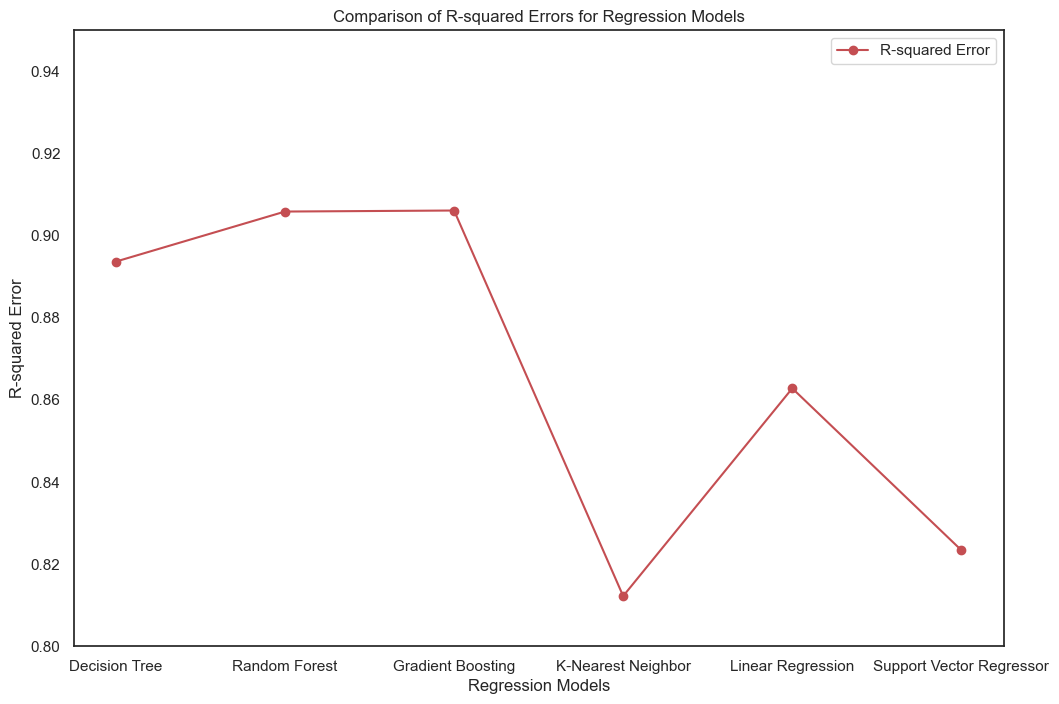

In [34]:
models = ['Decision Tree', 'Random Forest', 'Gradient Boosting', 'K-Nearest Neighbor', 'Linear Regression', 'Support Vector Regressor']
errors = [dt_rse, rf_rse, gb_rse, knn_rse, lr_rse, svr_rse]

plt.figure(figsize=(12, 8))
plt.plot(models, errors, marker='o', linestyle='-', color='r', label='R-squared Error')

# Set y-axis limits for better visualization
plt.ylim(0.8, 0.95)

# Add labels and title
plt.title('Comparison of R-squared Errors for Regression Models')
plt.xlabel('Regression Models')
plt.ylabel('R-squared Error')
plt.legend()
#plt.grid(True)  # You can remove this line if you don't want grid lines

# Show the plot
plt.show()